age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [5]:
#Задание 8.1
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введите результат выполнения кода heart['old'].sum().
import pandas as pd
heart = pd.read_csv('heart.csv')
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [6]:
heart['old'].sum()

79

### Задание 8.2
1 point possible (graded)
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст (лет)	Мужчины	    Женщины
до 20       	123/76  	116/72
21-30	        126/79  	120/75
31-40	        129/81  	127/80
41-50	        135/83  	137/84
51-60	        142/85	    144/85
61 и старше 	142/80  	159/85

In [7]:
def get_trestbps_mean(sex, age):
    pressure = [
        [116, 120, 127, 137, 144, 159],
        [123, 126, 129, 135, 142, 142]
    ]

    if age < 21:
        return pressure[int(sex)][0]
    elif age >= 61:
        return pressure[int(sex)][5]
    else:
        return pressure[int(sex)][int((age - 1) // 10 - 1)]


heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['sex'], row['age']), axis=1)

In [9]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


### Задание 8.5
Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.
Сколько признаков получилось в датасете?

In [10]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
data = pd.concat([heart, type_bin], axis=1)

In [12]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


<AxesSubplot:>

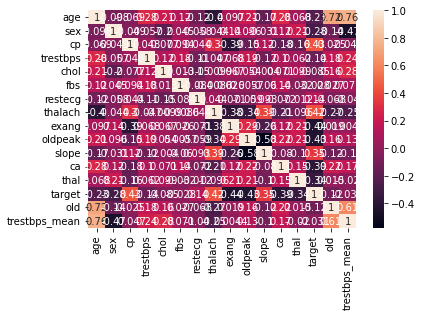

In [17]:
import seaborn as sns
sns.heatmap(heart.corr(), annot=True)